In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

## 1. 기본 예제

#### (1) 샘플 1 

+ 3 * 3 * 1 * 1 이미지 준비
+ 2 * 2 * 1 필터 준비

(1, 3, 3, 1)


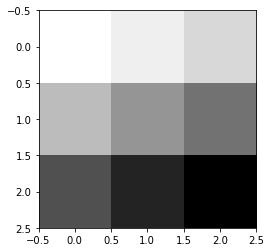

In [3]:
image = np.array([[[[1], [2], [3]],
                  [[4], [5], [6]],
                 [[7], [8], [9]]]], dtype=np.float32)

print(image.shape)
plt.imshow(image.reshape(3, 3), cmap="Greys")

(2, 2, 1, 1)
(1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


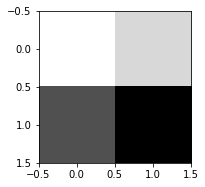

In [9]:
# padding없이 convolution layer 추출

filter = tf.constant([[[[1.]], [[1.]]], [[[1.]], [[1.]]]])
print(filter.shape)

conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding="VALID")

sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2, 2))
    plt.subplot(1, 2, i + 1)
    plt.imshow(one_img.reshape(2, 2), cmap="Greys")

(2, 2, 1, 1)
(1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


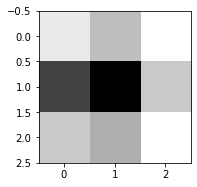

In [10]:
# padding을 이용한 convolution layer 추출

filter = tf.constant([[[[1.]], [[1.]]], [[[1.]], [[1.]]]])
print(filter.shape)

conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding="SAME")

sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 2, i + 1)
    plt.imshow(one_img.reshape(3, 3), cmap="Greys")

+ 3개의 필터 사용 : 2 * 2 * 1  * 3

(2, 2, 1, 3)
(1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


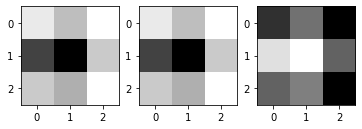

In [11]:
filter = tf.constant([[[[1., 10, -1]], [[1., 10, -1]]], [[[1., 10, -1]], [[1., 10, -1]]]])
print(filter.shape)

conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding="SAME")

sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 3, i + 1)
    plt.imshow(one_img.reshape(3, 3), cmap="Greys")

+ MaxPooling : 2 * 2 필터
+ padding 없음

In [14]:
image2 = tf.constant([[[[4], [3]], 
                       [[2], [1]]]]) 
print(image2.shape)

pool = tf.nn.max_pool(image2, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding="VALID")

sess = tf.Session()
p = sess.run(pool)
print(p.shape)
print(p)

(1, 2, 2, 1)
(1, 1, 1, 1)
[[[[4]]]]


In [15]:
# padding이 있을 경우

image2 = tf.constant([[[[4], [3]], 
                       [[2], [1]]]]) 
print(image2.shape)

pool = tf.nn.max_pool(image2, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding="SAME")

sess = tf.Session()
p = sess.run(pool)
print(p.shape)
print(p)

(1, 2, 2, 1)
(1, 2, 2, 1)
[[[[4]
   [3]]

  [[2]
   [1]]]]


## 2. 사례 1 : MNIST를 이용한 CNN

In [16]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


(784,)


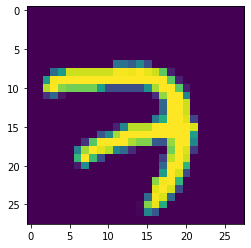

In [18]:
##### 데이터 확인

img = mnist.train.images[0]
print(img.shape)

plt.imshow(img.reshape(28, 28))

In [19]:
tf.reset_default_graph()

##### 입력받을 변수 준비

X = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

##### (1) 첫번째 convolution layer
 
+ 필터
    - 크기 : 3 * 3
    - 갯수 : 32
    - 색상 수 : 1

In [22]:
# 원본 이미지 준비
origin_X = tf.reshape(X, [-1, 28, 28, 1])

# 필터 준비
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))

# convolution layer
Layer1 = tf.nn.conv2d(origin_X, W1, strides=[1, 1, 1, 1], padding="SAME")
print(Layer1)

Layer1 = tf.nn.relu(Layer1)
print(Layer1)

Tensor("Conv2D_1:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)


##### (2) 첫번째  Pooling